#Import & Setup & Load

In [ ]:
# Install dependencies (if not already in Colab)
!pip install lime imbalanced-learn beautifulsoup4

# Import libraries
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN

import lime
import lime.lime_text
import joblib

import scipy.stats as ss

from collections import Counter

In [ ]:
#Dataset
df = pd.read_csv("fake_job_postings.csv")

#Data Exploration (Before Cleaning)

##Shape

In [ ]:
print("Shape: ",df.shape)

Shape:  (17880, 25)


##Variables Type

In [ ]:
print("Type of variables: ")
df.dtypes

Type of variables: 


,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


##First 5 Rows of Data

In [ ]:
print("First 5 rows: ")
df.head(5)

First 5 rows: 


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##Title (Barchart)

/tmp/ipython-input-3735633723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_title.index, x=top_title.values, palette="viridis")


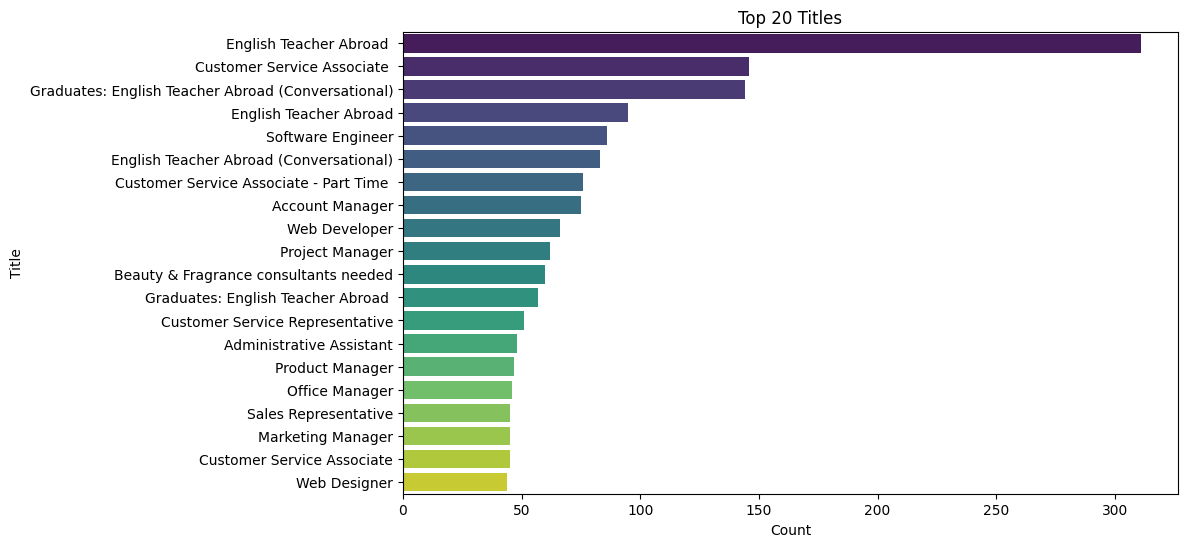

In [ ]:
#Title
top_title = df['title'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_title.index, x=top_title.values, palette="viridis")
plt.title("Top 20 Titles")
plt.xlabel("Count")
plt.ylabel("Title")
plt.show()

##Location (Barchart)

/tmp/ipython-input-12390954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locs.index, x=top_locs.values, palette="viridis")


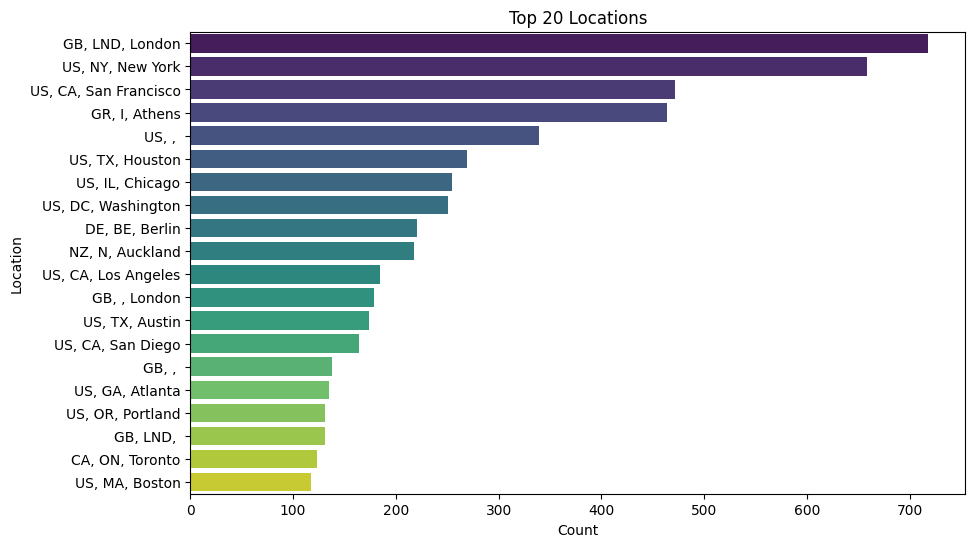

In [ ]:
#Location
top_locs = df['location'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_locs.index, x=top_locs.values, palette="viridis")
plt.title("Top 20 Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

/tmp/ipython-input-1545792570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")


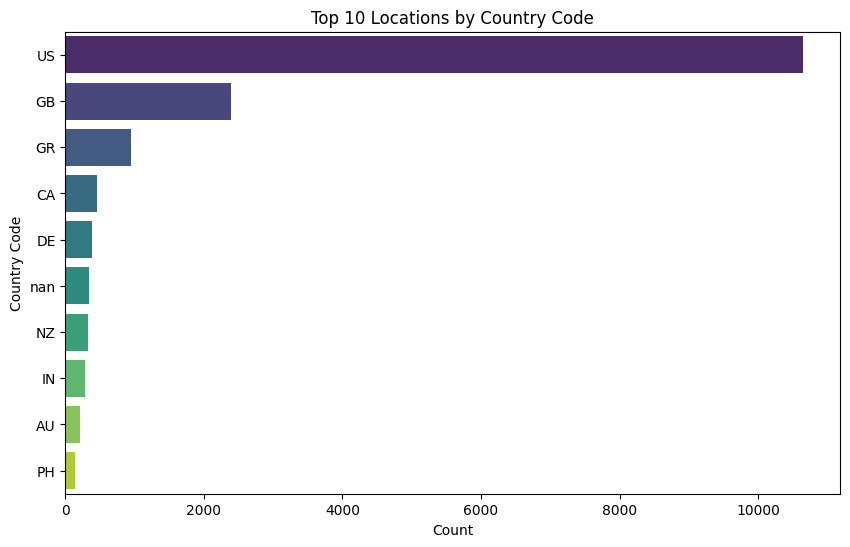

In [ ]:
#Country Code
df['country_code'] = df['location'].astype(str).apply(lambda x: x.split(',')[0].strip())

top_countries = df['country_code'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")
plt.title("Top 10 Locations by Country Code")
plt.xlabel("Count")
plt.ylabel("Country Code")
plt.show()

##Department (Barchart)

/tmp/ipython-input-914826024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_department.index, x=top_department.values, palette="viridis")


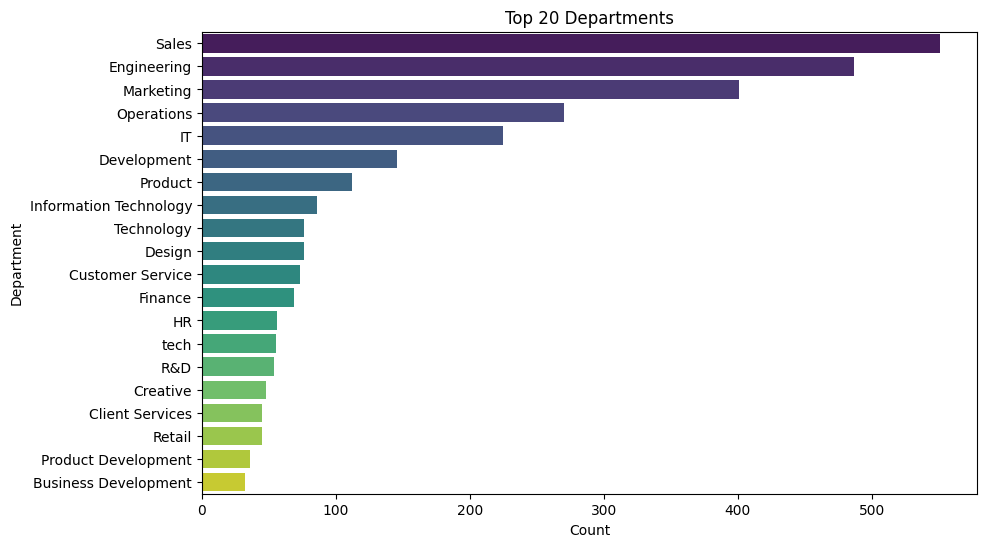

In [ ]:
#Department
top_department = df['department'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_department.index, x=top_department.values, palette="viridis")
plt.title("Top 20 Departments")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()

##Salary Range (Histogram)

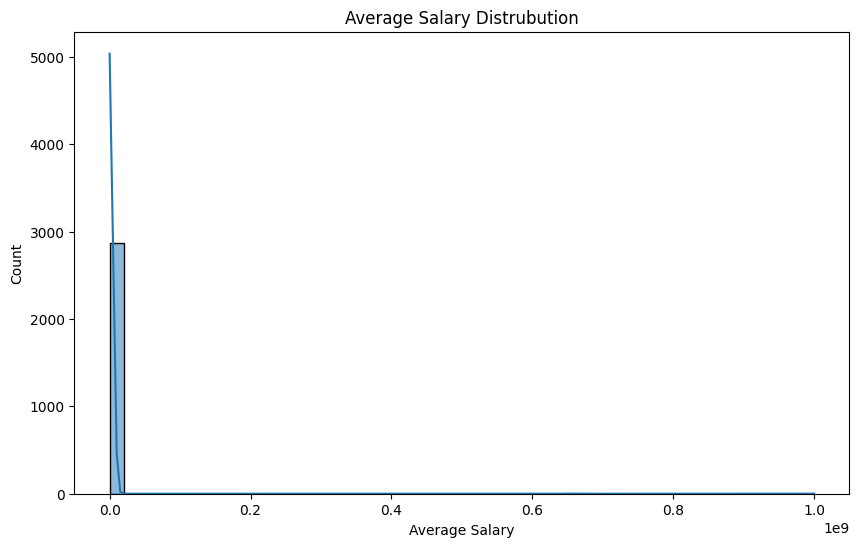

In [ ]:
#Salary Range
# Split salary_range into min and max
df[['salary_min', 'salary_max']] = df['salary_range'].str.split('-', expand=True)

# Convert to numeric
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

# Average salary
df['salary_avg'] = df[['salary_min','salary_max']].mean(axis=1)
df[['salary_range','salary_min','salary_max','salary_avg']]

# Distribution of average salary
plt.figure(figsize=(10,6))
sns.histplot(df['salary_avg'].dropna(), bins=50, kde=True)
plt.title("Average Salary Distrubution")
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.show()

##Company Profile (Histogram)

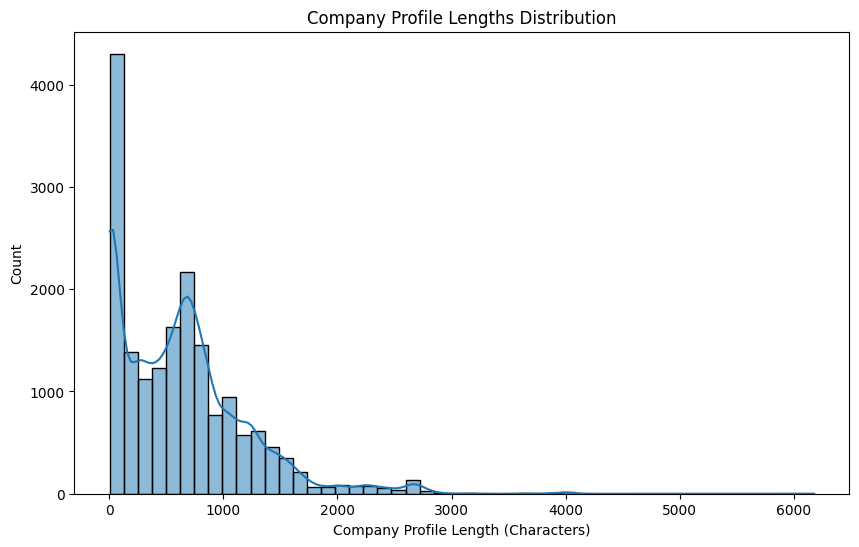

In [ ]:
#Company Profile Length
df['company_profile_len'] = df['company_profile'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['company_profile_len'], bins=50, kde=True)
plt.title("Company Profile Lengths Distribution")
plt.xlabel("Company Profile Length (Characters)")
plt.ylabel("Count")
plt.show()

##Description (Histogram)

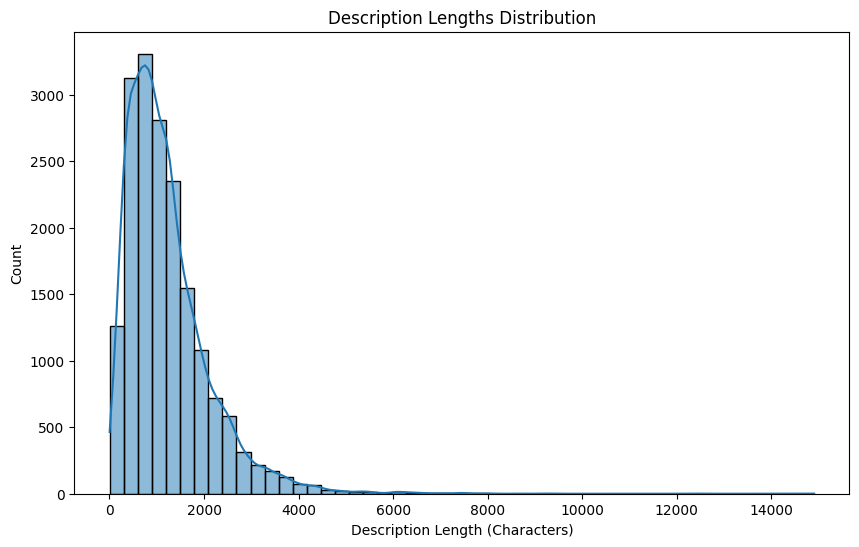

In [ ]:
#Description Length
df['description_len'] = df['description'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['description_len'], bins=50, kde=True)
plt.title("Description Lengths Distribution")
plt.xlabel("Description Length (Characters)")
plt.ylabel("Count")
plt.show()

##Requirements (Barchart)

/tmp/ipython-input-1667068849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_requirements.index, x=top_requirements.values, palette="viridis")


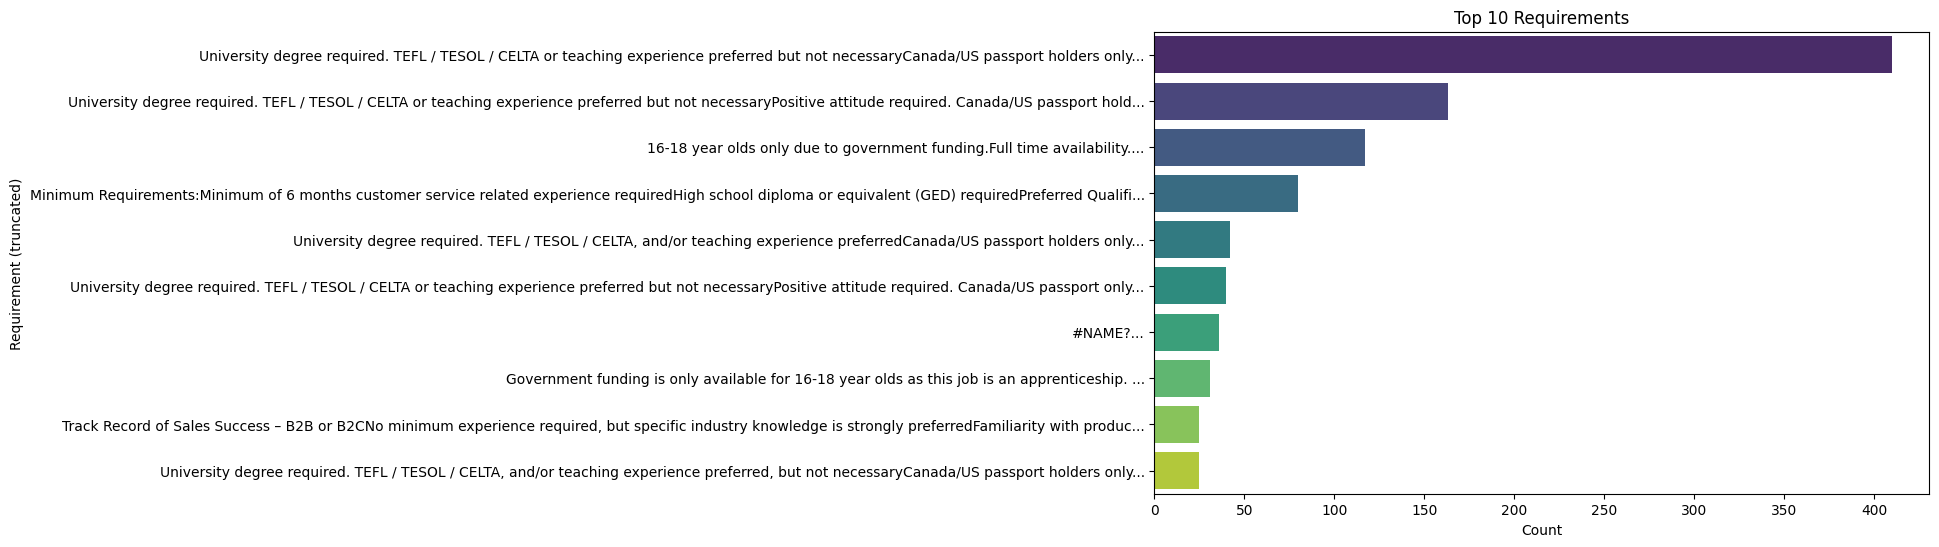

In [ ]:
#Requirements
top_requirements = df['requirements'].value_counts().nlargest(10)
top_requirements.index = top_requirements.index.str.slice(0,150) + "..."

plt.figure(figsize=(10,6))
sns.barplot(y=top_requirements.index, x=top_requirements.values, palette="viridis")
plt.title("Top 10 Requirements")
plt.xlabel("Count")
plt.ylabel("Requirement (truncated)")
plt.show()

##Benefits (Histogram)

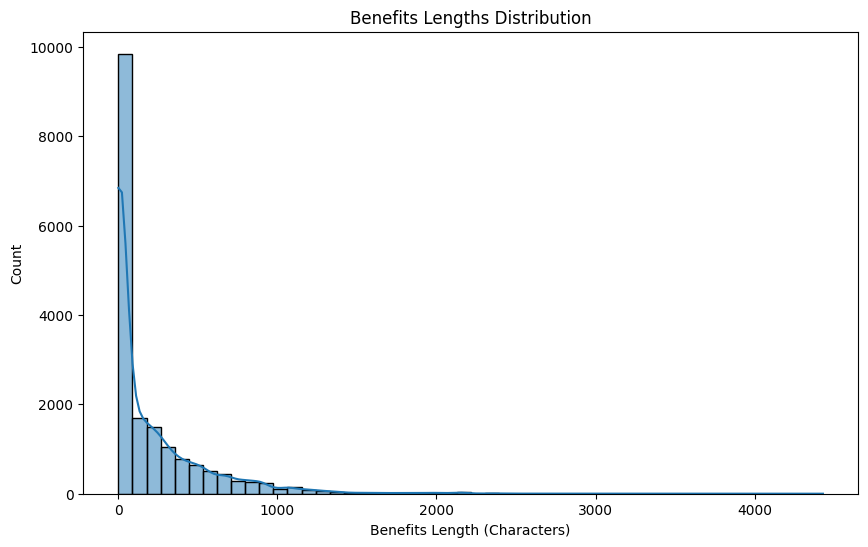

In [ ]:
#Benefits Length
df['benefits_len'] = df['benefits'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['benefits_len'], bins=50, kde=True)
plt.title("Benefits Lengths Distribution")
plt.xlabel("Benefits Length (Characters)")
plt.ylabel("Count")
plt.show()

##Telecommuting (Barchart)

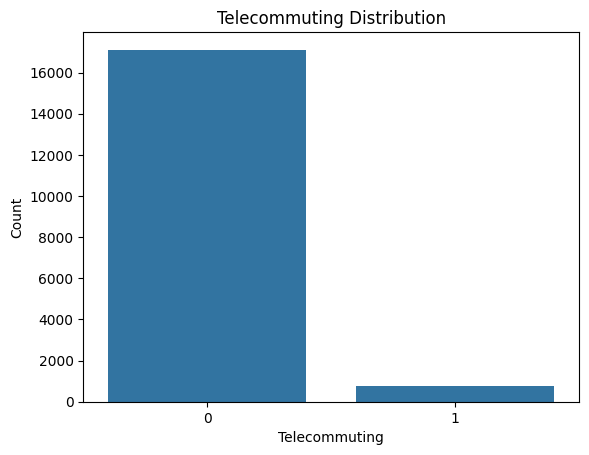

In [ ]:
#Telecommuting
sns.countplot(x='telecommuting', data=df)
plt.title("Telecommuting Distribution")
plt.xlabel("Telecommuting")
plt.ylabel("Count")
plt.show()

##Has Company Logo (Barchart)

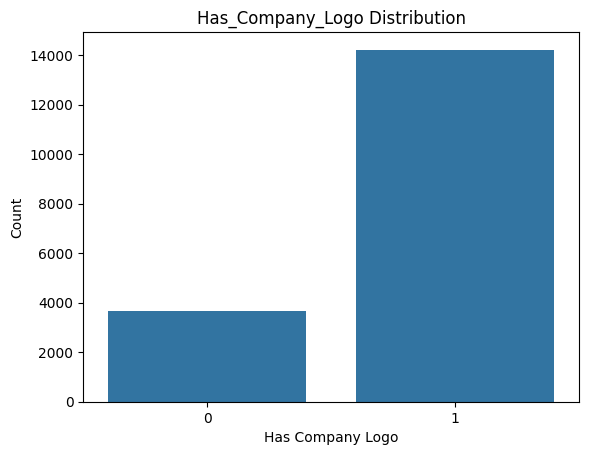

In [ ]:
#Has Company Logo
sns.countplot(x='has_company_logo', data=df)
plt.title("Has_Company_Logo Distribution")
plt.xlabel("Has Company Logo")
plt.ylabel("Count")
plt.show()

##Has Questions (Barchart)

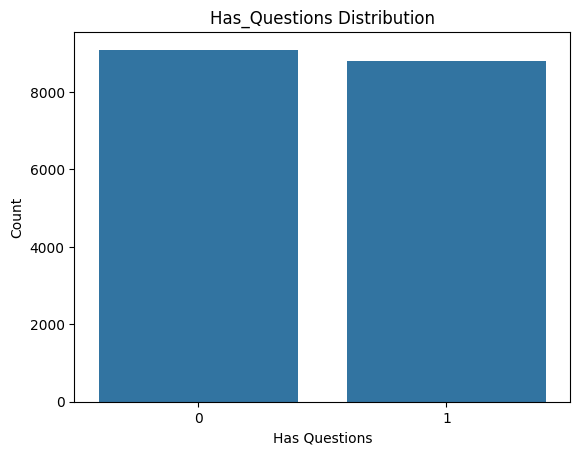

In [ ]:
#Has Questions
sns.countplot(x='has_questions', data=df)
plt.title("Has_Questions Distribution")
plt.xlabel("Has Questions")
plt.ylabel("Count")
plt.show()

##Employment Type (Barchart)

/tmp/ipython-input-1864998075.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=employment_type.index, x=employment_type.values, palette="viridis")


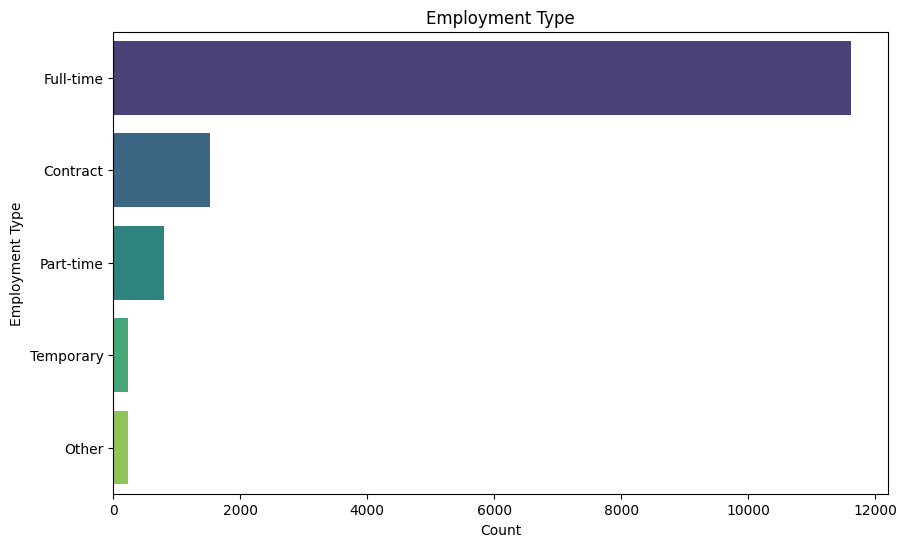

In [ ]:
#Employment type
employment_type = df['employment_type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=employment_type.index, x=employment_type.values, palette="viridis")
plt.title("Employment Type")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.show()

##Required Experience (Barchart)

/tmp/ipython-input-1735350429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=required_experience.index, x=required_experience.values, palette="viridis")


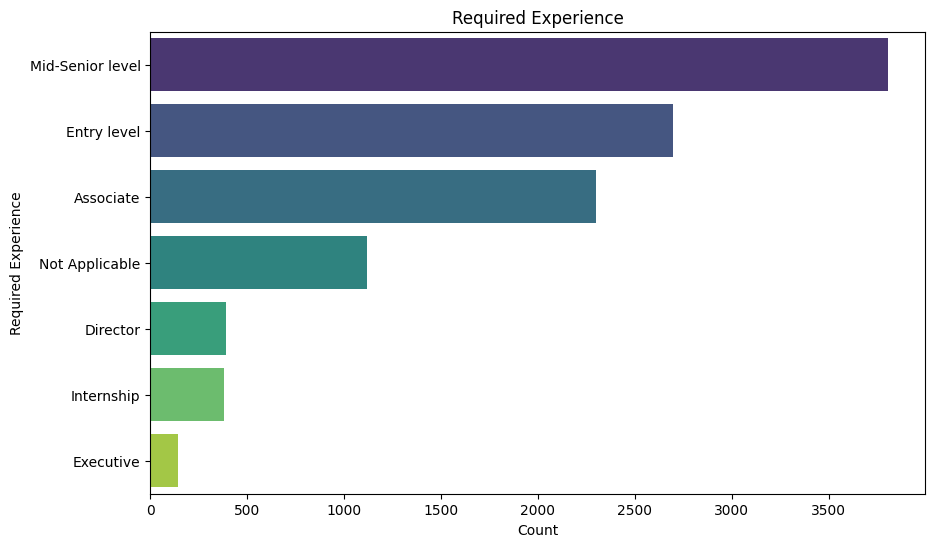

In [ ]:
#Required Experience
required_experience = df['required_experience'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=required_experience.index, x=required_experience.values, palette="viridis")
plt.title("Required Experience")
plt.xlabel("Count")
plt.ylabel("Required Experience")
plt.show()

##Required Education (Barchart)

/tmp/ipython-input-2200573645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=required_education.index, x=required_education.values, palette="viridis")


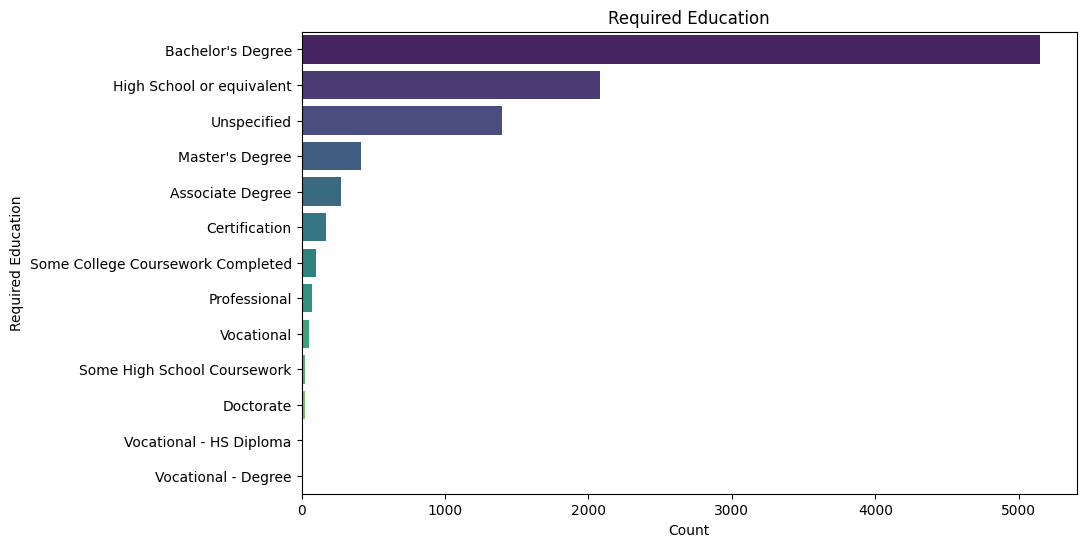

In [ ]:
#Required Education
required_education = df['required_education'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=required_education.index, x=required_education.values, palette="viridis")
plt.title("Required Education")
plt.xlabel("Count")
plt.ylabel("Required Education")
plt.show()

##Industry (Barchart)

/tmp/ipython-input-1214360243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_industry.index, x=top_industry.values, palette="viridis")


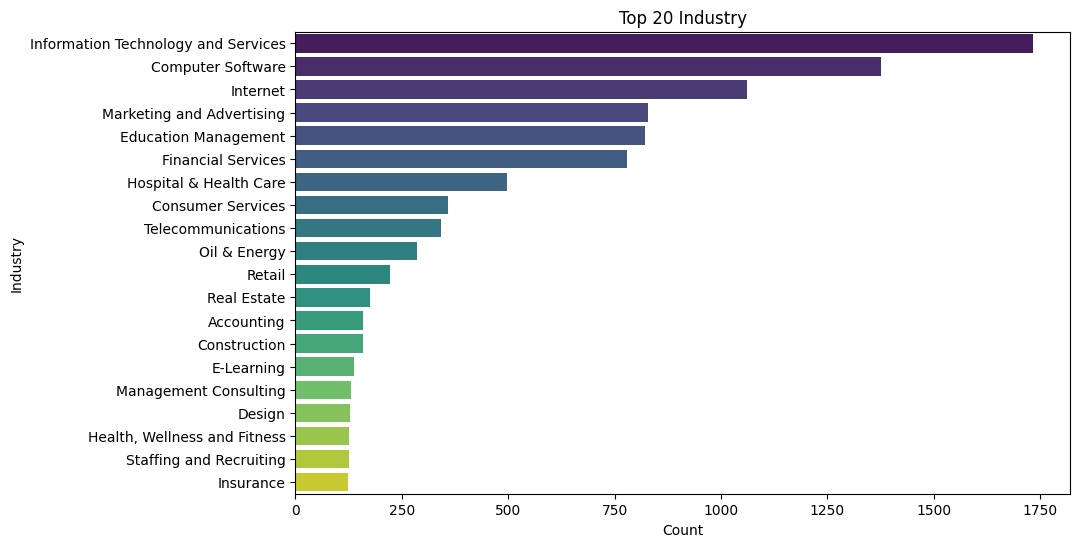

In [ ]:
#Industry
top_industry = df['industry'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_industry.index, x=top_industry.values, palette="viridis")
plt.title("Top 20 Industry")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

##Function (Barchart)

/tmp/ipython-input-3262801038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_function.index, x=top_function.values, palette="viridis")


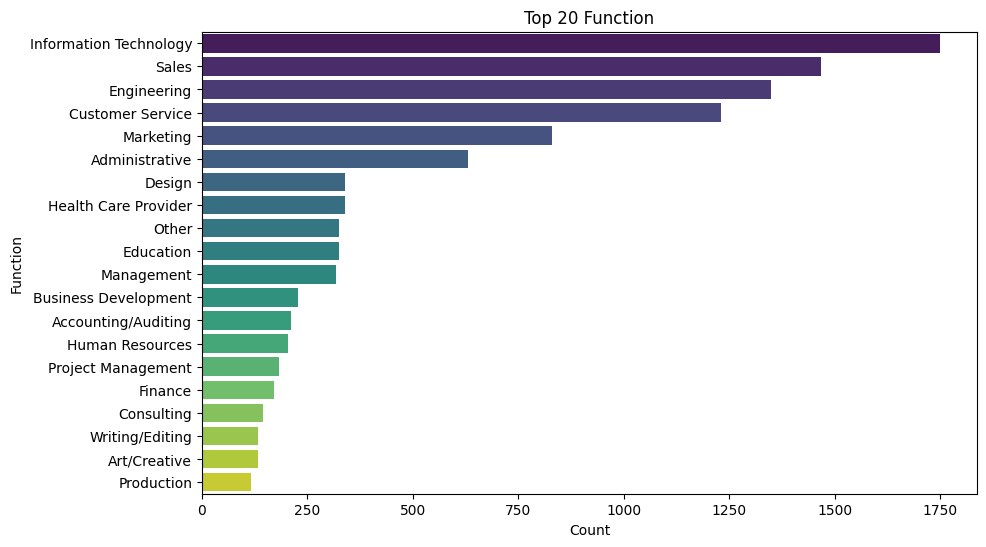

In [ ]:
#Function
top_function = df['function'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_function.index, x=top_function.values, palette="viridis")
plt.title("Top 20 Function")
plt.xlabel("Count")
plt.ylabel("Function")
plt.show()

##Fraudulent (Barchart)

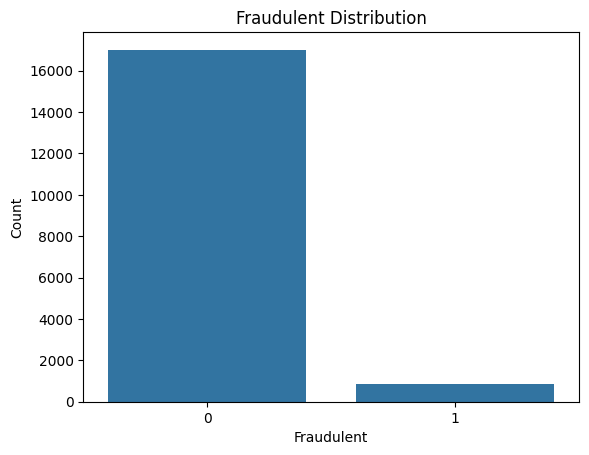

In [ ]:
#Fraudulent
sns.countplot(x='fraudulent', data=df)
plt.title("Fraudulent Distribution")
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.show()

##Fraudulent (Piechart)

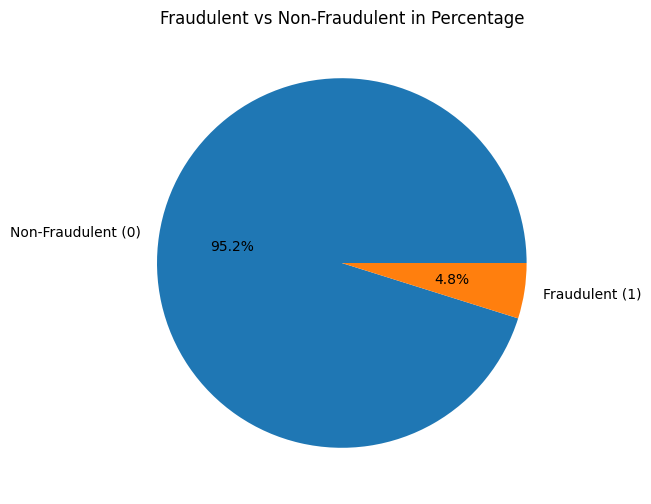

In [ ]:
#Fraudulent in percentage
fraud_counts = df['fraudulent'].value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))
fraud_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Fraudulent (0)','Fraudulent (1)'])
plt.title("Fraudulent vs Non-Fraudulent in Percentage")
plt.ylabel("")
plt.show()

##Fraudulent vs Title (Barchart)

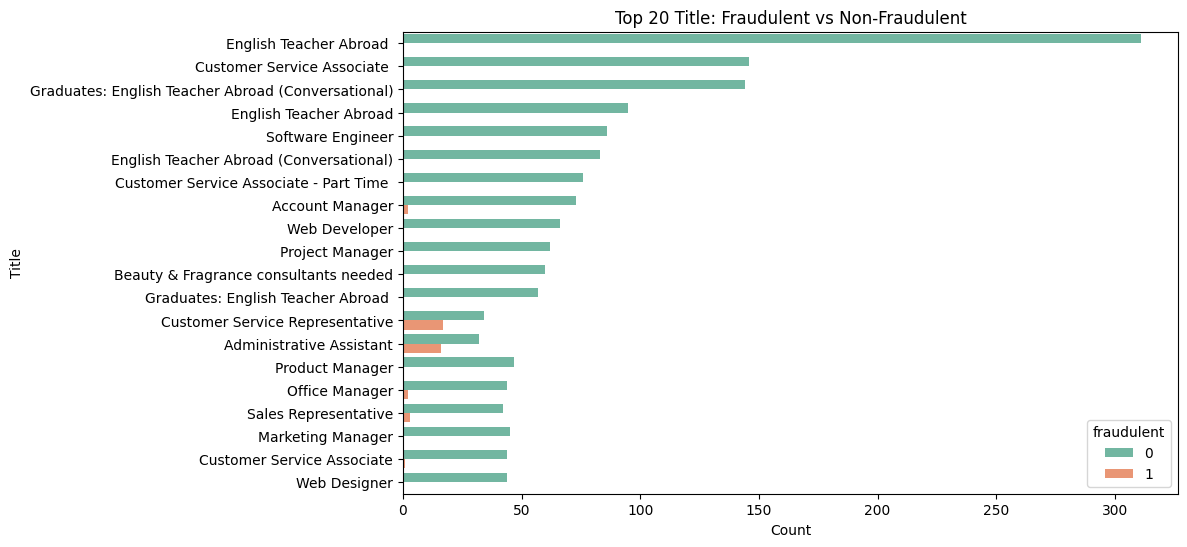

In [ ]:
#Fraudulent vs Title
top_titles = df['title'].value_counts().nlargest(20).index

plt.figure(figsize=(10,6))
sns.countplot(y='title', hue='fraudulent',data=df[df['title'].isin(top_titles)],order=top_titles, palette="Set2")

plt.title("Top 20 Title: Fraudulent vs Non-Fraudulent")
plt.xlabel("Count")
plt.ylabel("Title")
plt.show()

##Fraudulent vs Location (Barchart)

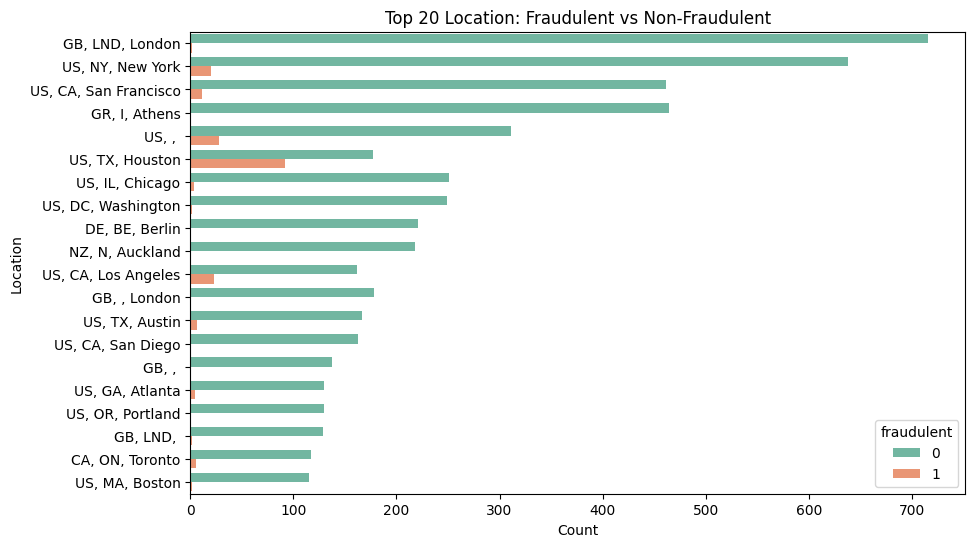

In [ ]:
#Fraudulent vs Location
top_locations = df['location'].value_counts().nlargest(20).index

plt.figure(figsize=(10,6))
sns.countplot(y='location', hue='fraudulent', data=df[df['location'].isin(top_locations)], order=top_locations, palette="Set2")

plt.title("Top 20 Location: Fraudulent vs Non-Fraudulent")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

##Fraudulent vs Department (Barchart)

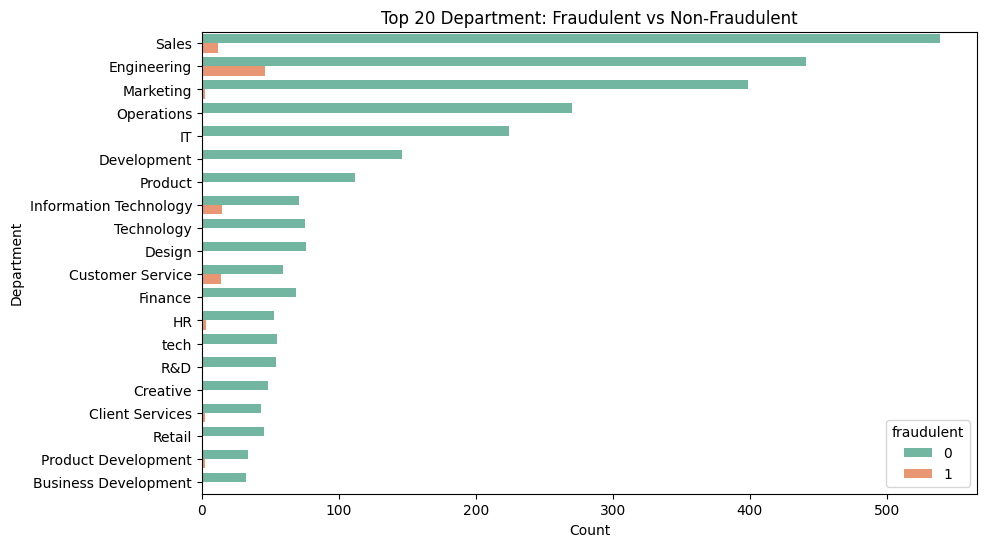

In [ ]:
#Fraudulent vs Department
top_departments = df['department'].value_counts().nlargest(20).index

plt.figure(figsize=(10,6))
sns.countplot(y='department', hue='fraudulent', data=df[df['department'].isin(top_departments)], order=top_departments, palette="Set2")

plt.title("Top 20 Department: Fraudulent vs Non-Fraudulent")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()

##Fraudulent vs Salary Range (Histogram)

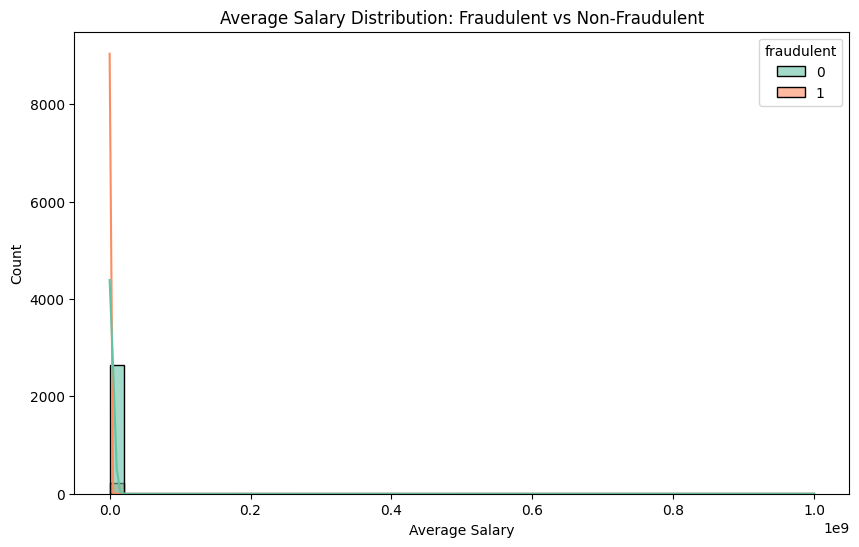

In [ ]:
#Fraudulent vs Average Salary
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='salary_avg', hue='fraudulent', bins=50, kde=True, palette="Set2", alpha=0.6)

plt.title("Average Salary Distribution: Fraudulent vs Non-Fraudulent")
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Company Profile (Histogram)

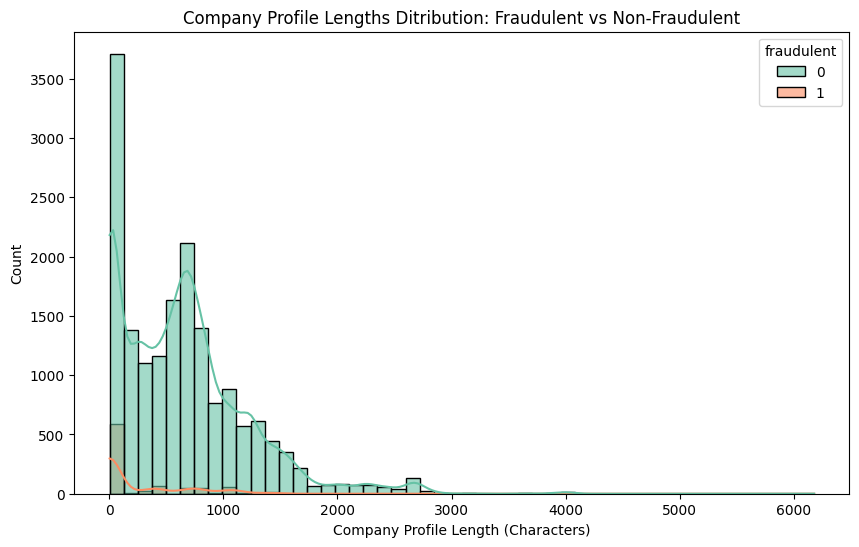

In [ ]:
#Fraudulent vs Company Profile Length
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='company_profile_len', hue='fraudulent', bins=50, kde=True, palette="Set2", alpha=0.6)

plt.title("Company Profile Lengths Ditribution: Fraudulent vs Non-Fraudulent")
plt.xlabel("Company Profile Length (Characters)")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Description (Histogram)

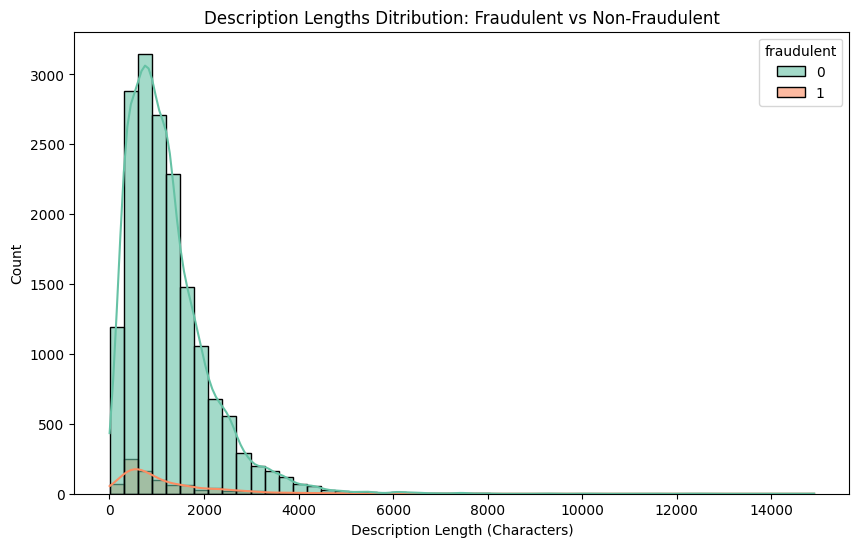

In [ ]:
#Fraudulent vs Description Length
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='description_len', hue='fraudulent', bins=50, kde=True, palette="Set2", alpha=0.6)

plt.title("Description Lengths Ditribution: Fraudulent vs Non-Fraudulent")
plt.xlabel("Description Length (Characters)")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Requirements (Barchart)

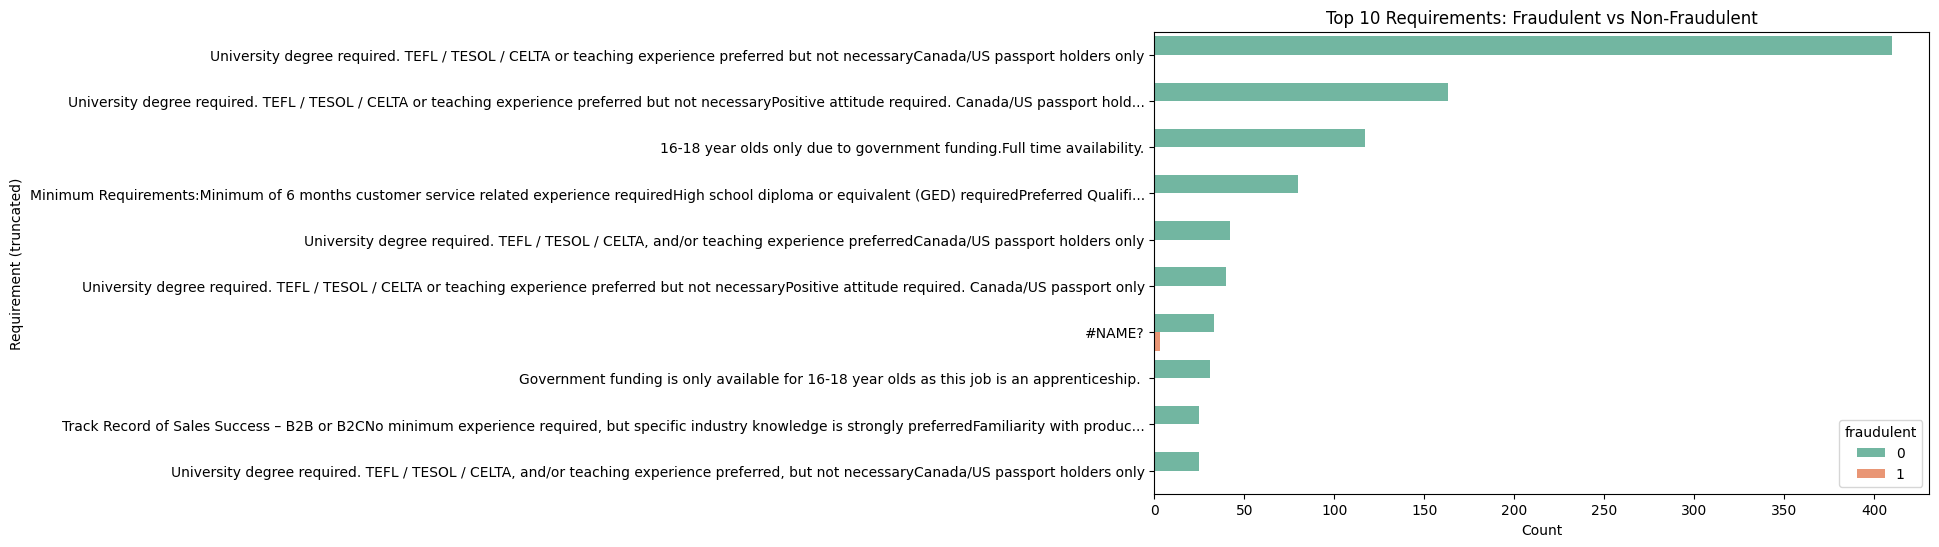

In [ ]:
#Fraudulent vs Requirements
top_requirements = df['requirements'].value_counts().nlargest(10).index
requirements_labels = [req[:150] + "..." if len(req) > 150 else req for req in top_requirements]

plt.figure(figsize=(10,6))
sns.countplot(y='requirements', hue='fraudulent', data=df[df['requirements'].isin(top_requirements)], order=top_requirements, palette="Set2")

# Replace y-tick labels with truncated text
plt.yticks(ticks=range(len(requirements_labels)), labels=requirements_labels)

plt.title("Top 10 Requirements: Fraudulent vs Non-Fraudulent")
plt.xlabel("Count")
plt.ylabel("Requirement (truncated)")
plt.show()

##Fraudulent vs Benefits (Histogram)

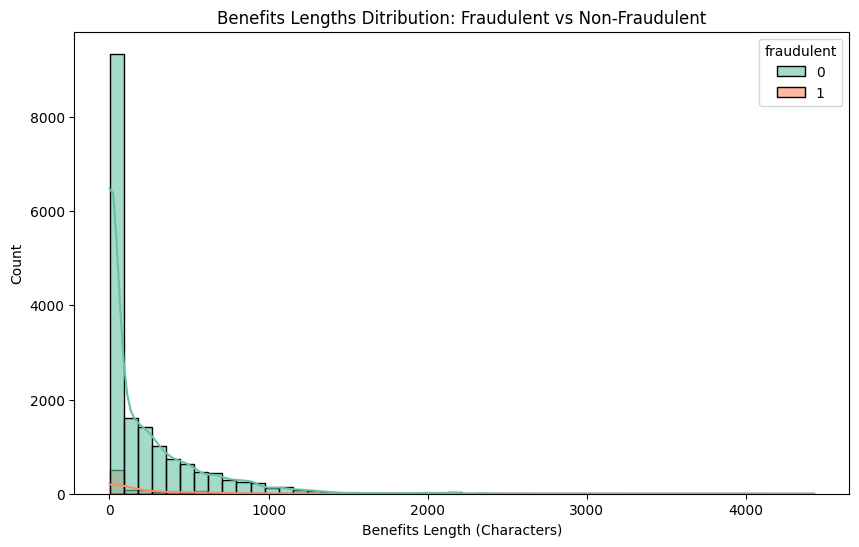

In [ ]:
#Fraudulent vs Benefits Length
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='benefits_len', hue='fraudulent', bins=50, kde=True, palette="Set2", alpha=0.6)

plt.title("Benefits Lengths Ditribution: Fraudulent vs Non-Fraudulent")
plt.xlabel("Benefits Length (Characters)")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Telecommuting (Barchart)

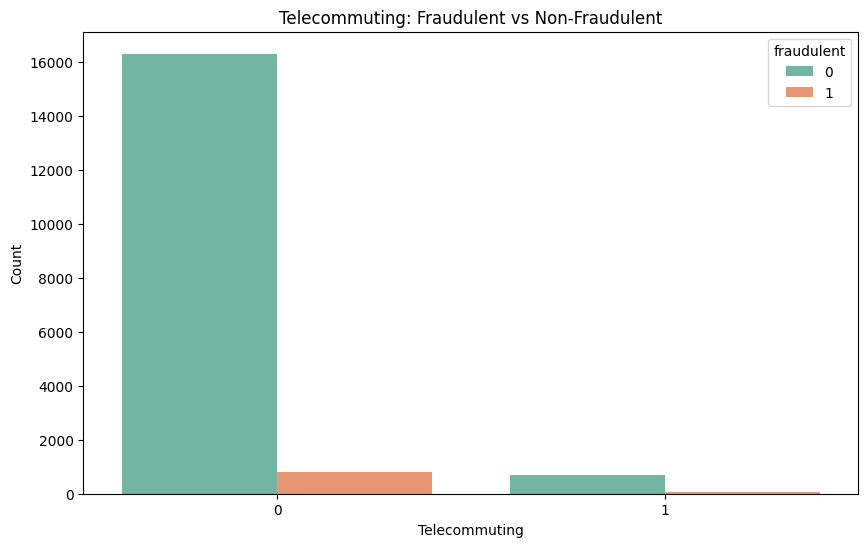

In [ ]:
#Fraudulent vs Telecommuting
plt.figure(figsize=(10,6))
sns.countplot(x='telecommuting', hue='fraudulent', data=df, palette="Set2")

plt.title("Telecommuting: Fraudulent vs Non-Fraudulent")
plt.xlabel("Telecommuting")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Has Company Logo (Barchart)

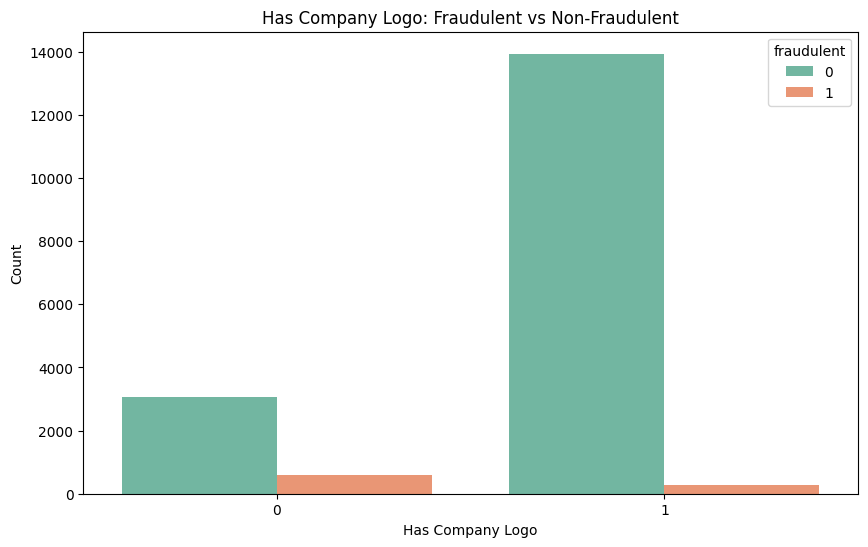

In [ ]:
#Fraudulent vs Has Company Logo
plt.figure(figsize=(10,6))
sns.countplot(x='has_company_logo', hue='fraudulent', data=df, palette="Set2")

plt.title("Has Company Logo: Fraudulent vs Non-Fraudulent")
plt.xlabel("Has Company Logo")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Has Questions (Barchart)

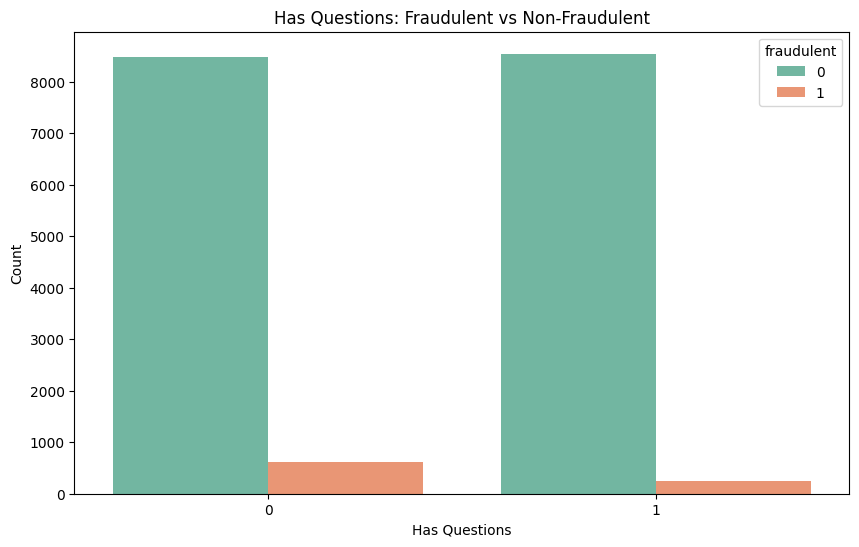

In [ ]:
#Fraudulent vs Has Questions
plt.figure(figsize=(10,6))
sns.countplot(x='has_questions', hue='fraudulent', data=df, palette="Set2")

plt.title("Has Questions: Fraudulent vs Non-Fraudulent")
plt.xlabel("Has Questions")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Employment Type (Barchart)

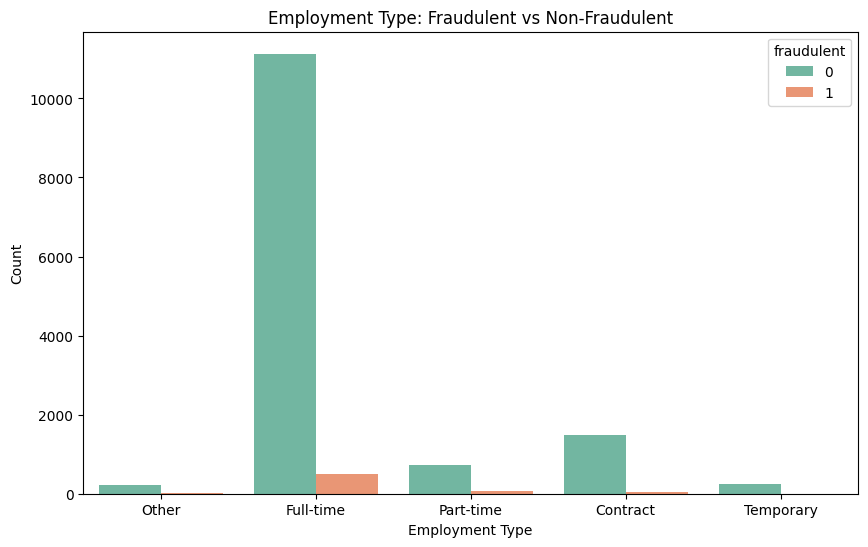

In [ ]:
#Fraudulent vs Employment Type
plt.figure(figsize=(10,6))
sns.countplot(x='employment_type', hue='fraudulent', data=df, palette="Set2")

plt.title("Employment Type: Fraudulent vs Non-Fraudulent")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Required Experience (Barchart)

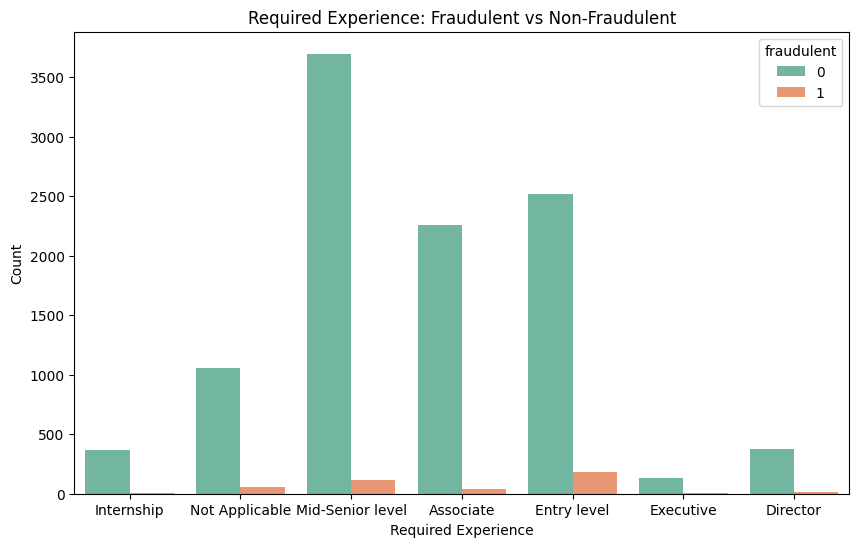

In [ ]:
# Fraudulent vs Required Experience
plt.figure(figsize=(10,6))
sns.countplot(x='required_experience', hue='fraudulent', data=df, palette="Set2")

plt.title("Required Experience: Fraudulent vs Non-Fraudulent")
plt.xlabel("Required Experience")
plt.ylabel("Count")
plt.show()

##Fraudulent vs Required Education (Barchart)

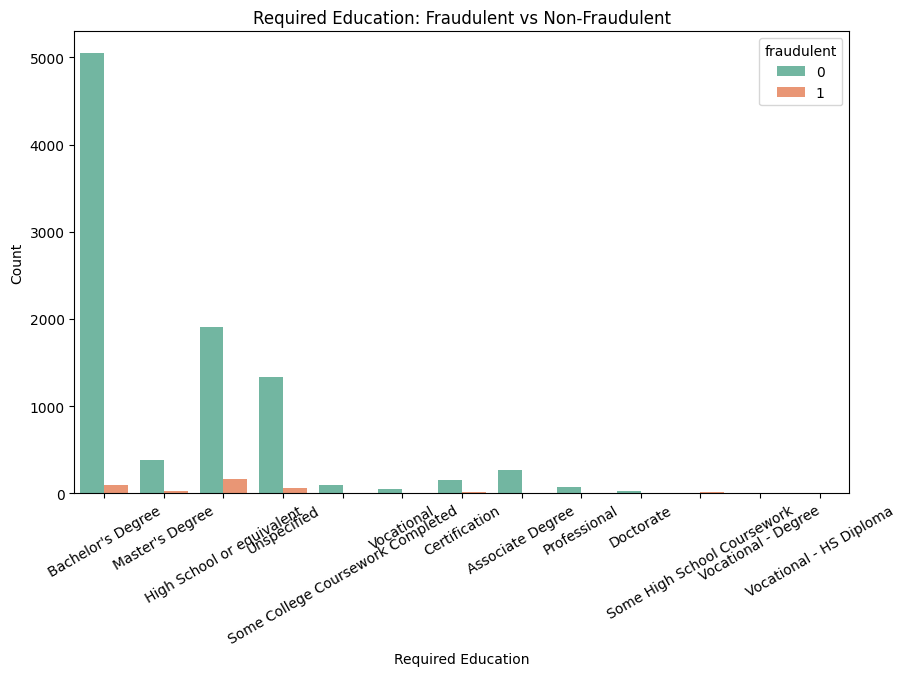

In [ ]:
# Fraudulent vs Required Education
plt.figure(figsize=(10,6))
sns.countplot(x='required_education', hue='fraudulent', data=df, palette="Set2")

plt.title("Required Education: Fraudulent vs Non-Fraudulent")
plt.xlabel("Required Education")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.show()

##Fraudulent vs Industry (Barchart)



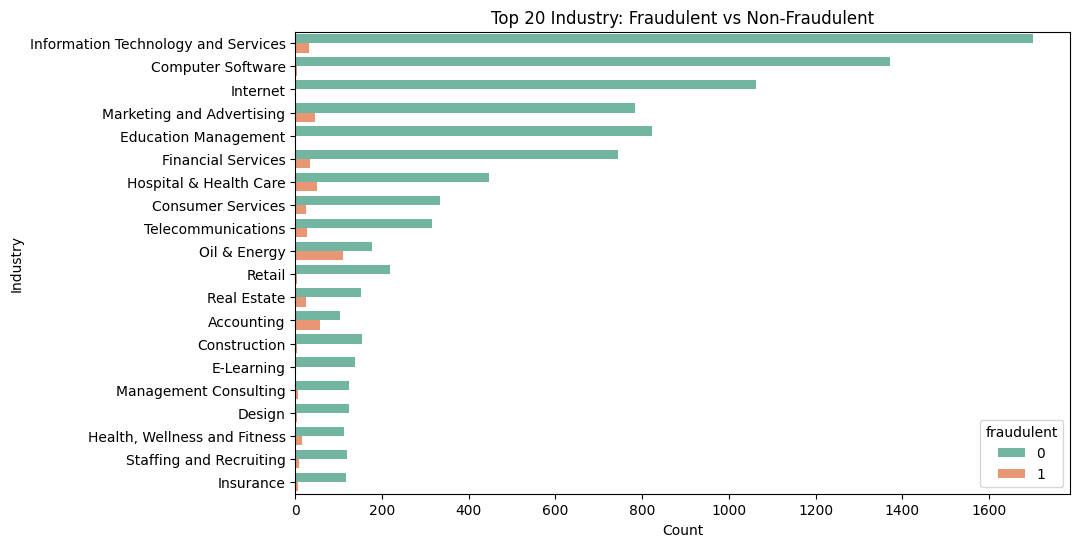

In [ ]:
# Fraudulent vs Industry
top_industries = df['industry'].value_counts().nlargest(20).index

plt.figure(figsize=(10,6))
sns.countplot(y='industry', hue='fraudulent', data=df[df['industry'].isin(top_industries)], order=top_industries, palette="Set2")

plt.title("Top 20 Industry: Fraudulent vs Non-Fraudulent")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

##Fraudulent vs Function (Barchart)

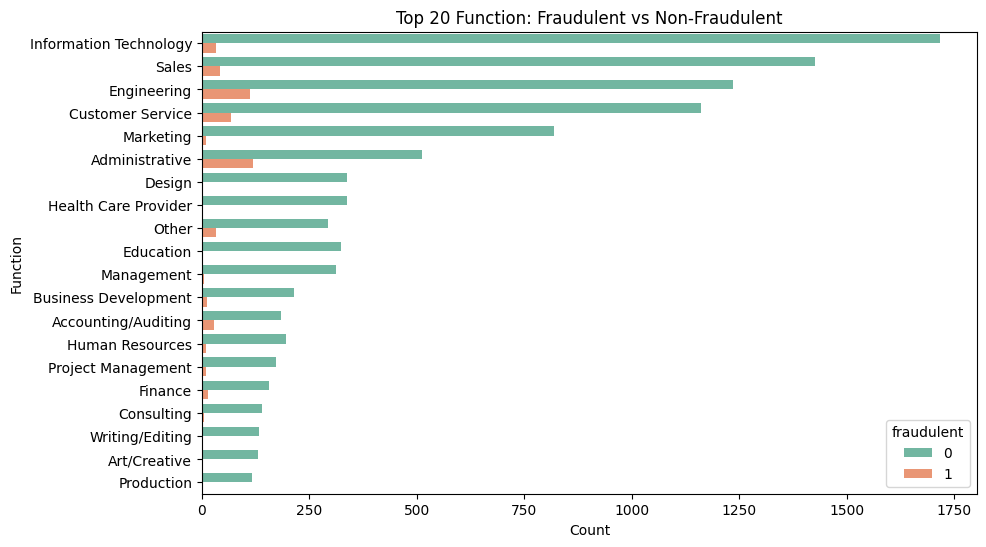

In [ ]:
#Fraudulent vs Function
top_functions = df['function'].value_counts().nlargest(20).index

plt.figure(figsize=(10,6))
sns.countplot(y='function', hue='fraudulent', data=df[df['function'].isin(top_functions)], order=top_functions, palette="Set2")

plt.title("Top 20 Function: Fraudulent vs Non-Fraudulent")
plt.xlabel("Count")
plt.ylabel("Function")
plt.show()

##Fraudulent vs Employment Type vs Required Education (Barchart)

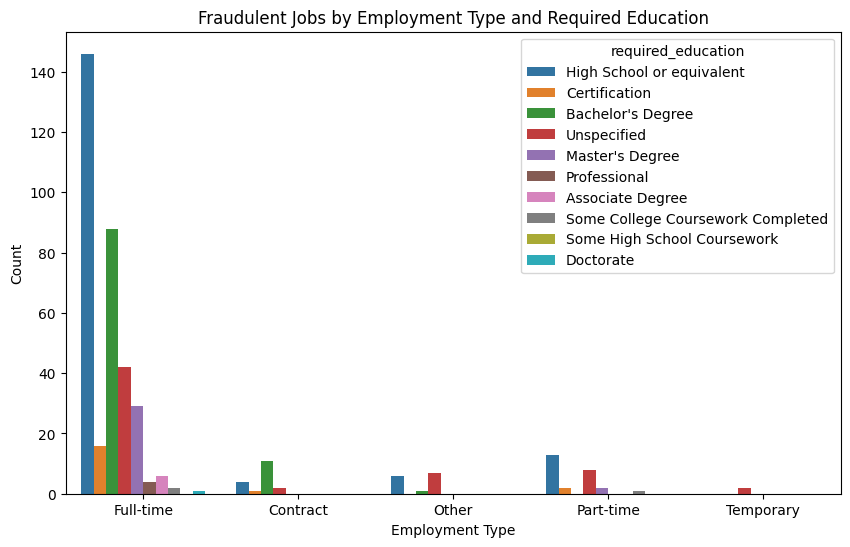

In [ ]:
#Employment Type vs Required Education vs Fraudulent
plt.figure(figsize=(10,6))
sns.countplot(x="employment_type", hue="required_education", data=df[df['fraudulent']==1])
plt.title("Fraudulent Jobs by Employment Type and Required Education")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

##Categorical Associations with Fraudulent (Barchart)

/tmp/ipython-input-3328862306.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(assoc.keys()), y=list(assoc.values()), palette="viridis")


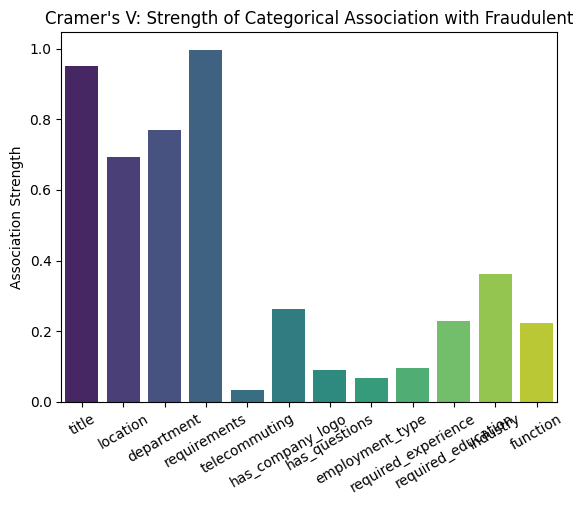

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1,r-1)))

cat_cols = ['title','location','department','requirements','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function']
assoc = {col: cramers_v(df[col], df['fraudulent']) for col in cat_cols}

sns.barplot(x=list(assoc.keys()), y=list(assoc.values()), palette="viridis")
plt.title("Cramer's V: Strength of Categorical Association with Fraudulent")
plt.ylabel("Association Strength")
plt.xticks(rotation=30)
plt.show()

##Numeric Features vs Fraudulent (Pairplot)

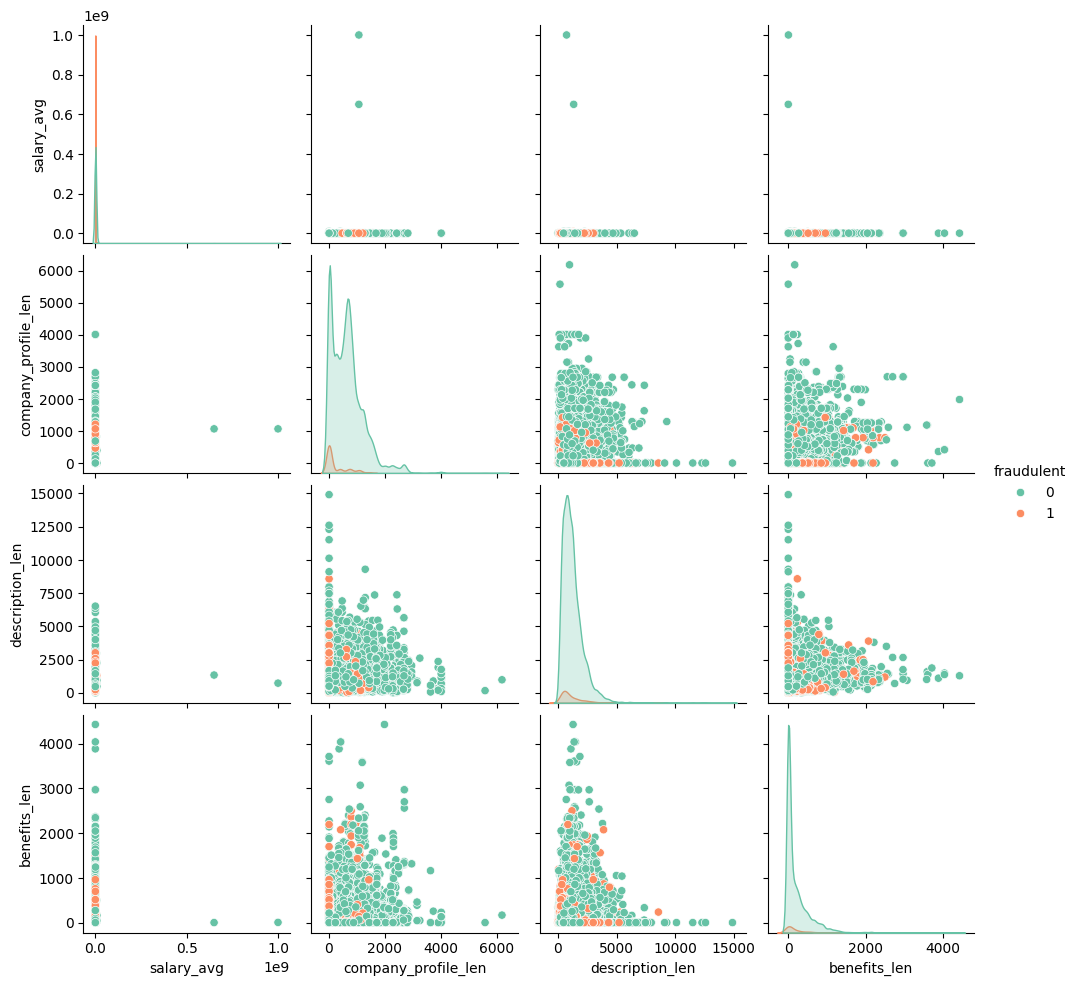

In [ ]:
numeric_cols = ['salary_avg','company_profile_len','description_len','benefits_len']
sns.pairplot(df[numeric_cols + ['fraudulent']], hue="fraudulent", palette="Set2", diag_kind="kde")
plt.show()

##Fraudulent vs Top 20 Locations vs Top 20 Industries

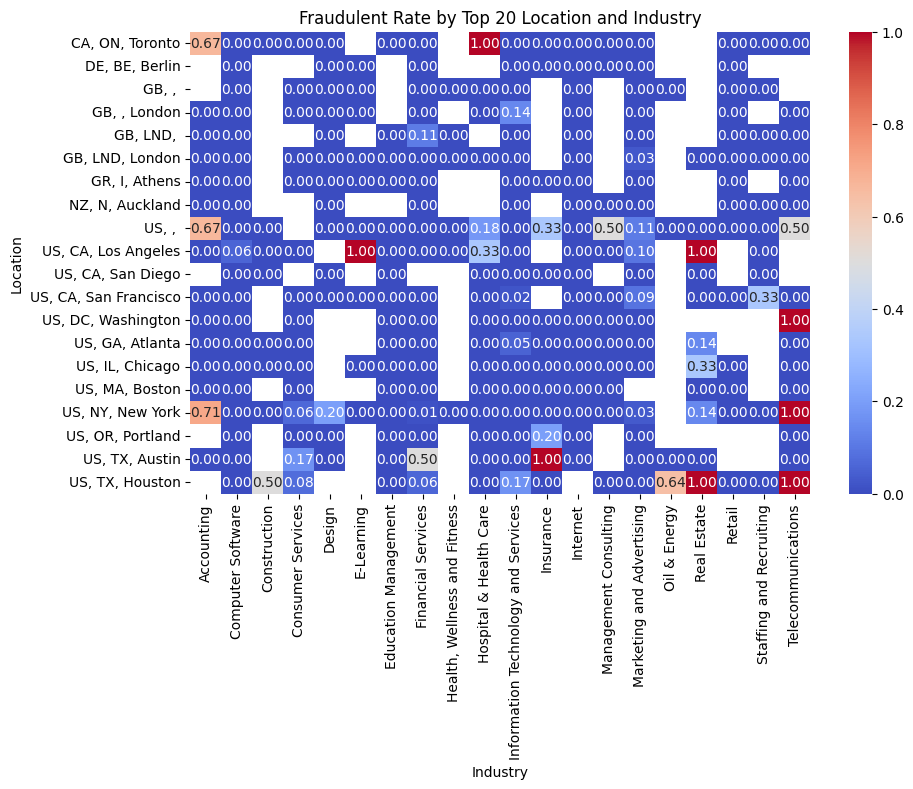

In [ ]:
#Fraudulent vs Top 20 Locations vs Top 20 Industries
top_locs = df['location'].value_counts().nlargest(20).index
top_inds = df['industry'].value_counts().nlargest(20).index

pivot = pd.crosstab(df[df['location'].isin(top_locs)]['location'], df[df['industry'].isin(top_inds)]['industry'], values=df['fraudulent'], aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Fraudulent Rate by Top 20 Location and Industry")
plt.xlabel("Industry")
plt.ylabel("Location")
plt.show()

##Check Duplicate Row

In [ ]:
# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


##Salary Outlier Detection (Boxplot)

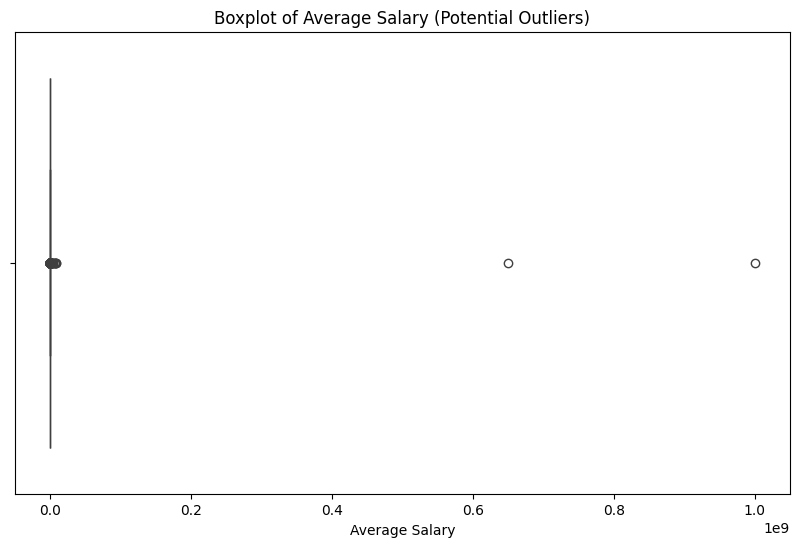

In [ ]:
#Average Salary Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['salary_avg'])
plt.title("Boxplot of Average Salary (Potential Outliers)")
plt.xlabel("Average Salary")
plt.show()

##Company Profile Length Outlier Detection (Boxplot)

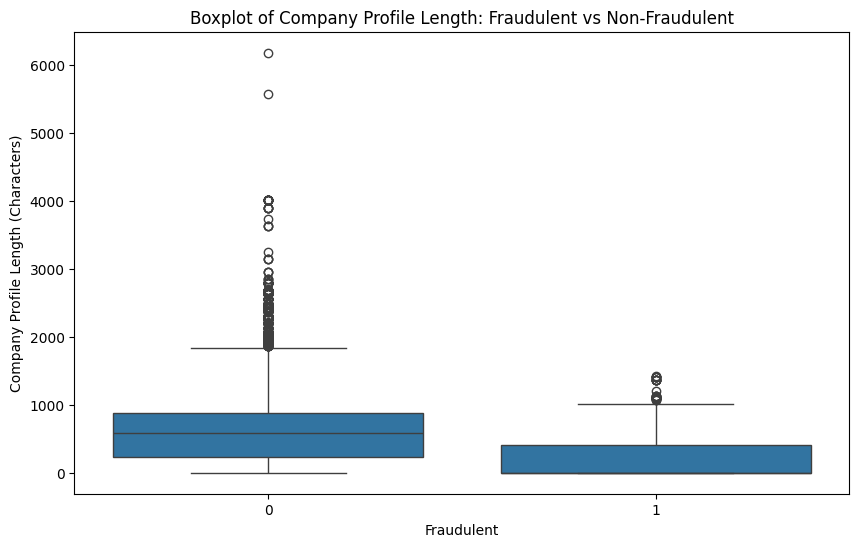

In [ ]:
#Company Profile Length Outliers
df['company_profile_len'] = df['company_profile'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.boxplot(x='fraudulent', y='company_profile_len', data=df)
plt.title("Boxplot of Company Profile Length: Fraudulent vs Non-Fraudulent")
plt.xlabel("Fraudulent")
plt.ylabel("Company Profile Length (Characters)")
plt.show()

##Description Length Outlier Detection (Boxplot)

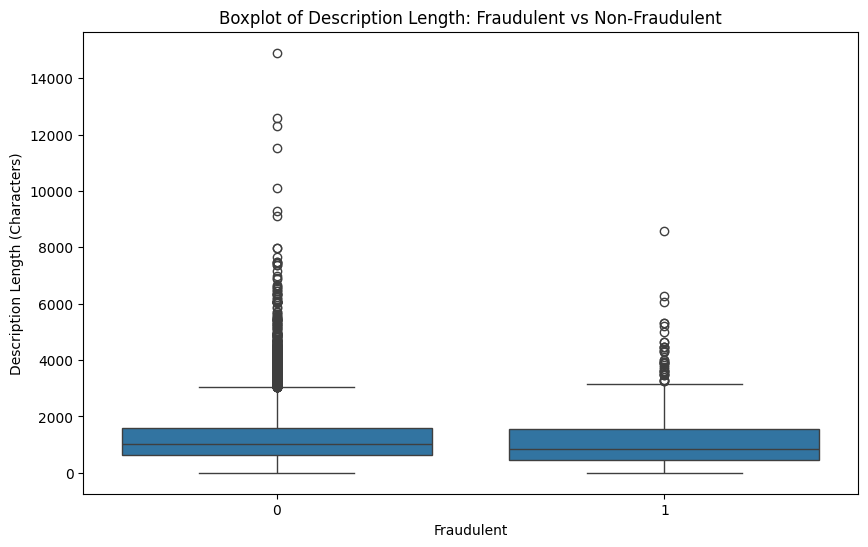

In [ ]:
#Description Length Outliers
df['description_len'] = df['description'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.boxplot(x='fraudulent', y='description_len', data=df)
plt.title("Boxplot of Description Length: Fraudulent vs Non-Fraudulent")
plt.xlabel("Fraudulent")
plt.ylabel("Description Length (Characters)")
plt.show()

##Benefits Length Outlier Detection (Boxplot)

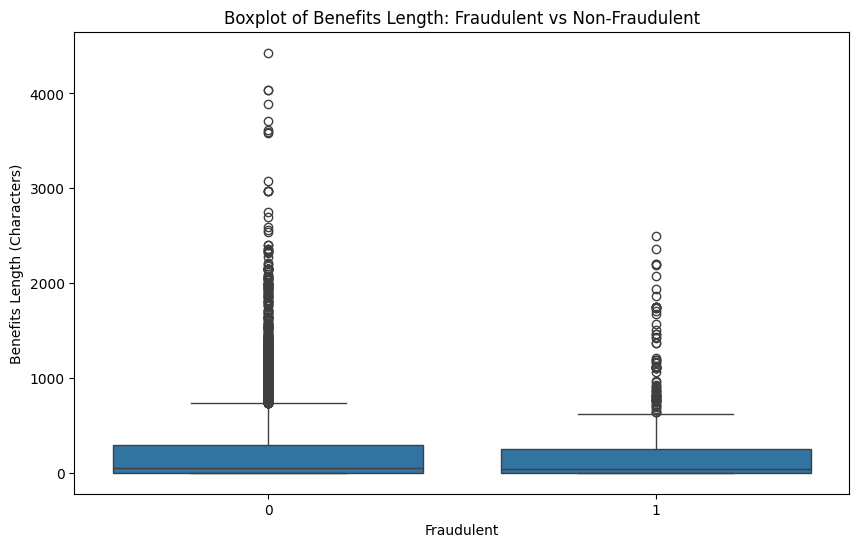

In [ ]:
#Benefits Length Outliers
df['benefits_len'] = df['benefits'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.boxplot(x='fraudulent', y='benefits_len', data=df)
plt.title("Boxplot of Benefits Length: Fraudulent vs Non-Fraudulent")
plt.xlabel("Fraudulent")
plt.ylabel("Benefits Length (Characters)")
plt.show()

##Company Profile Raw Text Word Frequency (Boxplot)

/tmp/ipython-input-3054897058.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


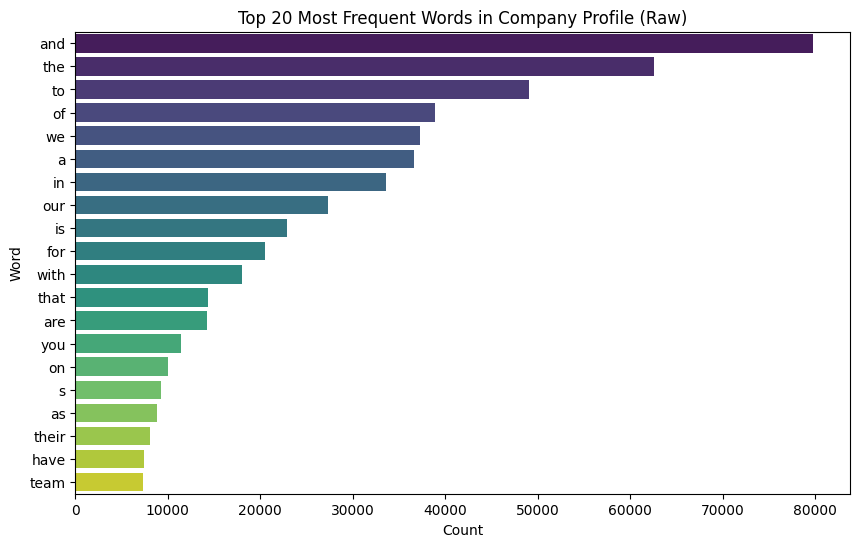

In [ ]:
# Tokenize Company Profile
all_words = " ".join(df['company_profile'].dropna().astype(str)).lower()
all_words = re.findall(r'\b\w+\b', all_words)

word_freq = Counter(all_words).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Frequent Words in Company Profile (Raw)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

##Description Raw Text Word Frequency (Boxplot)

/tmp/ipython-input-2483164673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


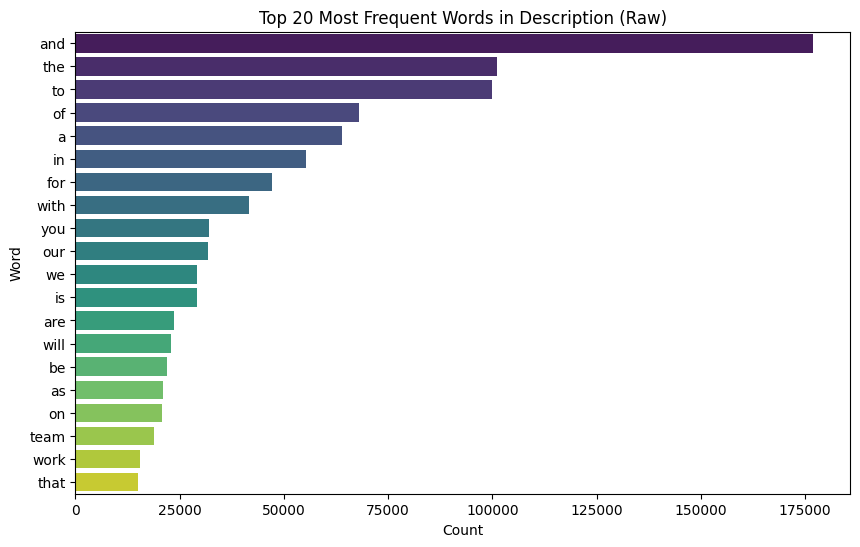

In [ ]:
#Tokenize Description
all_words = " ".join(df['description'].dropna().astype(str)).lower()
all_words = re.findall(r'\b\w+\b', all_words)

word_freq = Counter(all_words).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Frequent Words in Description (Raw)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

##Benefits Raw Text Word Frequency (Boxplot)

/tmp/ipython-input-399506241.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


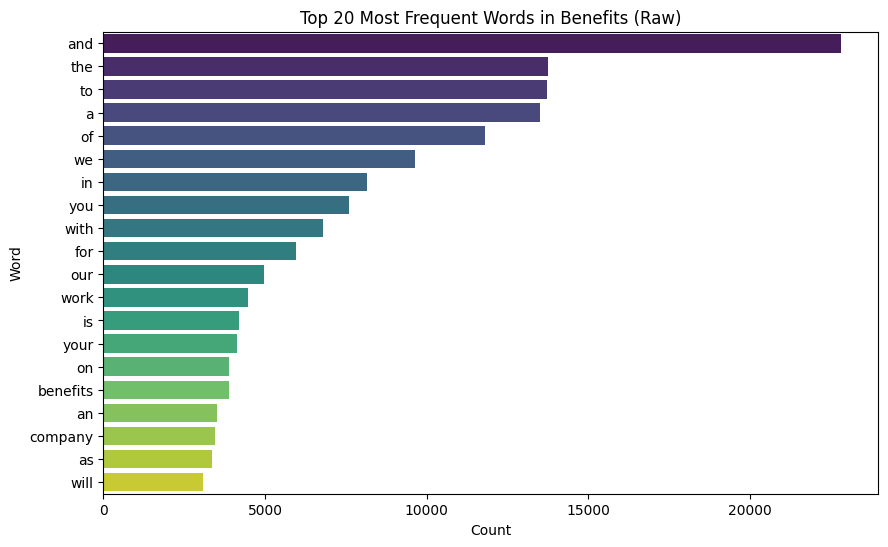

In [ ]:
#Tokenize Benefits
all_words = " ".join(df['benefits'].dropna().astype(str)).lower()
all_words = re.findall(r'\b\w+\b', all_words)

word_freq = Counter(all_words).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Frequent Words in Benefits (Raw)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

##Summary Statistics

In [ ]:
print("Summary Statistics: ")
df.describe(include="all").transpose()

Summary Statistics: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,17880.0,NaN,NaN,NaN,8940.5,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
title,17880,11231,English Teacher Abroad,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,17534,3105,"GB, LND, London",718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,6333,1337,Sales,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_range,2868,874,0-0,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_profile,14572,1709,We help teachers get safe &amp; secure jobs ab...,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,17879,14801,"Play with kids, get paid for it Love travel? J...",379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requirements,15184,11967,University degree required. TEFL / TESOL / CEL...,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
benefits,10668,6204,See job description,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telecommuting,17880.0,NaN,NaN,NaN,0.042897,0.202631,0.0,0.0,0.0,0.0,1.0
